# to do 

compare python and c gpio monitors

In [109]:
import numpy as np

import matplotlib.pyplot as plt
#from datetime import datetime
import datetime
import time
import pandas as pd
import numpy as np
import statistics
from scipy.optimize import curve_fit
import statistics
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import heapq
 
def closest(lst, K):
    #using heapq.nsmallest() to find the element in the list with the smallest absolute difference with K
    return heapq.nsmallest(1, lst, key=lambda x: abs(x-K))[0]

In [3]:
path = "/Users/frikken.1/documents/ret/surfaceStation/udaqTimeTesting/runs/"

# python timestamp reading

In [319]:
port0List = []
port1List = []
f = open(path+"gpioMonitor.txt", "r")
i=0
for x in f:
    i+=1
    numVal = x.strip('\n').split(',')
    if numVal[0] == '17':
        port0List.append(np.int64(numVal[1]))
    if numVal[0] == '22':
        port1List.append(np.int64(numVal[1]))
    
    #hitVal = numVal[0] + numVal[1]
    #hitTimeNS = np.int64(hitVal)
   
    #print(x.strip('\n'))
    #if i < 10:
        #print(numVal)
        #if numVal[0] =='22':
            
        #print(x.split(","))
        #print(np.float64(numVal))
        #print(numVal)
        #print(hitTimeNS)
    #port0List.append(hitTimeNS)
print(f'len p0 {len(port0List)} len p1 {len(port1List)}')
f.close()

len p0 1477 len p1 0


# python version coincidence check

In [ ]:
pltList = []
j =0
for i in port0List:
    
    
    if (abs(closest(port1List,i)- i)) < 1e5:
        j+=1
        #print(closest(port1List,i)- i)
        pltList.append(closest(port1List,i)- i)
print(j)

IndexError: list index out of range

In [321]:
pltList = []
for n,i in enumerate(port0List):
    #print(i)
    if n < len(port0List)-1:
        #if port0List[n+1] - i < 1.2e6:
        if n< 10:
            print(port0List[n+1] - i)
        #if port0List[n+1] - i > 1.9e7 and port0List[n+1] - i < 2.1e7:
        pltList.append(port0List[n+1] - i)

4372426
17082851
16177426
17055278
17053667
17055852
17103759
24117685
49935130
49972925


In [322]:
print(np.mean(pltList),np.std(pltList))

35322980.882791325 35251347.23726513


 mean 35322981.0 ns std dev 35251347.0 ns


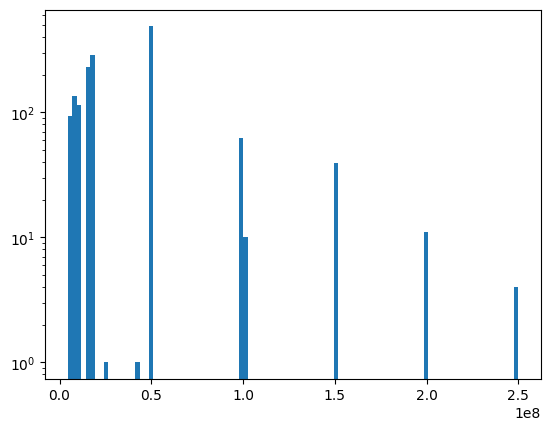

In [323]:
mean,std = norm.fit(pltList)

print(f' mean {mean.round(0)} ns std dev {std.round(0)} ns')
plt.hist(pltList, bins = 100)
plt.yscale('log')
#
#plt.xlim(-2e4,3e4)
#plt.xlim(meanVal - 10000, meanVal +20000)

# c version

In [324]:
port0List = []
port1List = []
f = open(path+"gpioPort0.txt", "r")
i=0
for x in f:
    i+=1
    num = x.strip('\n').split('.')
    numVal = num[0]+num[1]
    #print(num)
    timeVal = np.uint64(numVal)
    #print(timeVal)
    port0List.append(timeVal)
    #print(numVal)
print(len(port0List))
f.close()

f = open(path+"gpioPort1.txt", "r")
i=0
for x in f:
    i+=1
    num = x.strip('\n').split('.')
    numVal = num[0]+num[1]
    #print(num)
    timeVal = np.uint64(numVal)
    #print(timeVal)
    port1List.append(timeVal)
    #print(numVal)
print(len(port1List))

164
1403


In [325]:
pltList = []
for n,i in enumerate(port0List):
    #print(i)
    if n < len(port0List)-1:
        #if port0List[n+1] - i < 1.2e6:
        if n< 10:
            print(port0List[n+1] - i)
        #if port0List[n+1] - i > 1.9e7 and port0List[n+1] - i < 2.1e7:
        pltList.append(port0List[n+1] - i)

718111
8178259
5633445
10926055
5750963
10890852
5778815
2837833
8079741
5753074


In [326]:
print(np.mean(pltList),np.std(pltList))

7111104.969325153 2882339.4345158665


 mean 7111105.0 ns std dev 2882339.0 ns


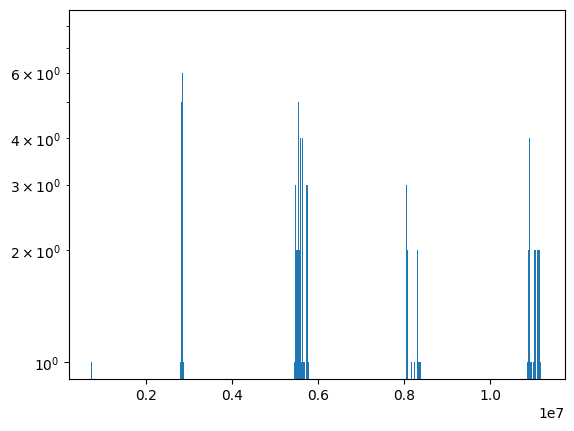

In [327]:
mean,std = norm.fit(pltList)

print(f' mean {mean.round(0)} ns std dev {std.round(0)} ns')
plt.hist(pltList, bins = 1000)
plt.yscale('log')
#plt.xlim(1.9e7,2.1e7)

In [318]:
1/20.

0.05